In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
from scipy.stats import ks_2samp

### first tryin to get a handle on the data

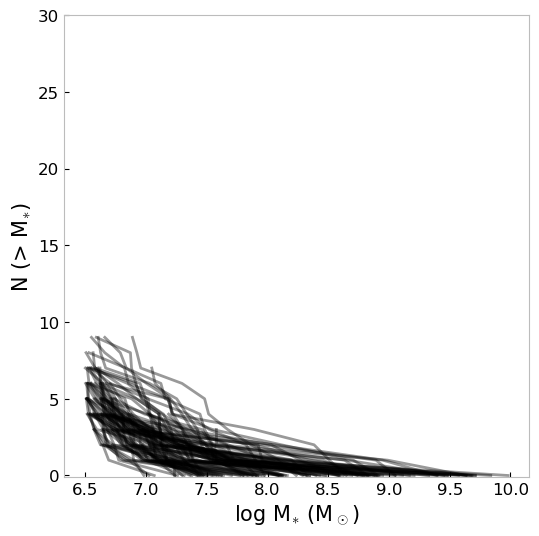

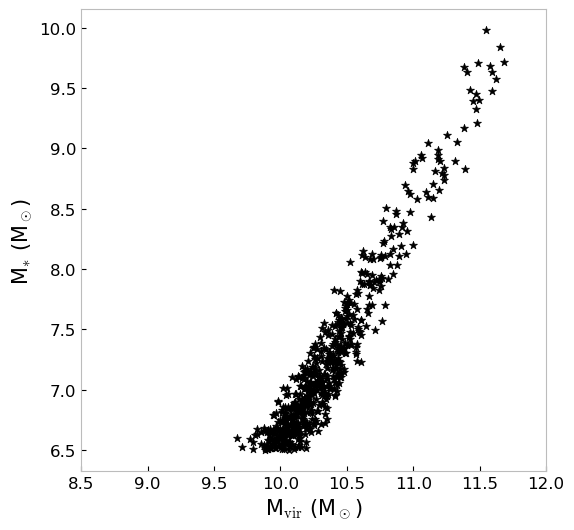

In [4]:
fid_theta = np.array([10.5, 2., 0.2, 0, 0, 0])
min_mass = 6.5

mock = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/correlation_test/alpha/mock_1/mock_data.npy")
mock.get_stats(min_mass=min_mass)
mock.plot_SMF()
mock.plot_SHMR()

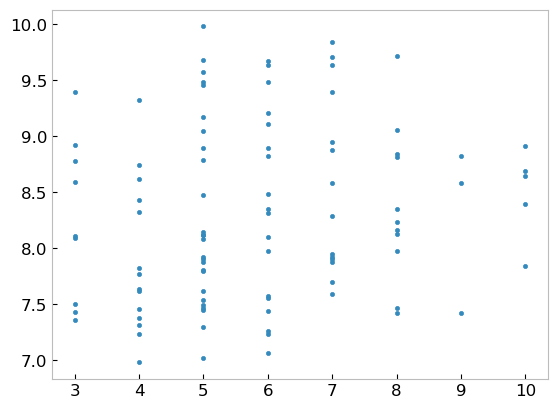

In [5]:
plt.scatter(mock.stat.Nsat_perhost, mock.stat.Ms_max, marker=".")

In [6]:
mock.stat.Nsat_unibin

array([ 3,  4,  5,  6,  7,  8,  9, 10])

### now the models

In [7]:
modelz = jsm_models.load_models("../../../data/MW-analog/meta_data_psi3/", Nsamples=3)

def forward(theta):
    modelz.get_stats(theta, min_mass, jsm_SHMR.general)
    return modelz

instance = forward(fid_theta)

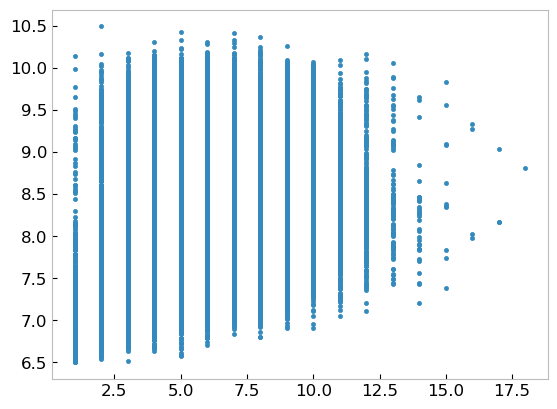

In [8]:
plt.scatter(instance.stat.Nsat_perhost, instance.stat.Ms_max, marker=".")

In [9]:
def lnL_KS_perbin(samp1, samp2):
    Ne = (len(samp1) * len(samp2))/(len(samp1) + len(samp2))
    if Ne > 4.0:
        return np.log(ks_2samp(samp1, samp2)[1])
    else:
        return np.nan
    
def lnL_KS(data, model):
    lnLs = []
    for i, val in enumerate(data.stat.Nsat_unibin):
        lnLs.append(lnL_KS_perbin(data.stat.Ms_max_split[i], model.stat.Ms_max_split[val - model.stat.Nsat_unibin.min()]))
    return np.nansum(lnLs)

In [10]:
Niter = 500
empty = np.zeros(shape=(Niter))

for j in range(Niter):
    instance = forward(fid_theta)
    empty[j] = np.nansum(lnL_KS(mock, instance))

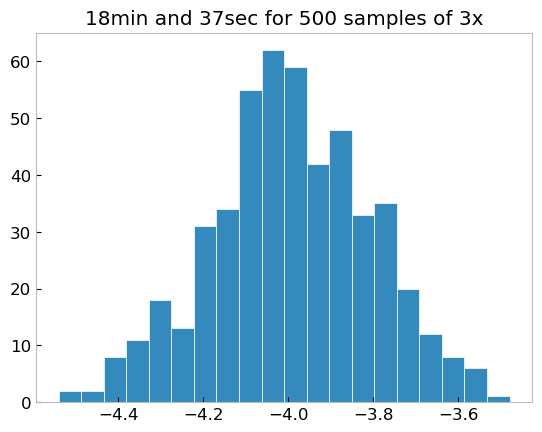

In [34]:
plt.title("18min and 37sec for 500 samples of 3x")
plt.hist(empty, bins=20, edgecolor="white")
plt.show()

In [12]:
# p_vals = []

# for i, val in enumerate(N_bin_D):
#     print(f"Nbin: {val}")

#     assert val == N_bin_M[val-min(N_bin_M)]

#     data = Msmax_Nsplit_D[i]
#     model = Msmax_Nsplit_M[val-min(N_bin_M)]

#     Ne = (len(data) * len(model))/(len(data) + len(model))
#     if Ne > 4.0:
#         D_stat, p_val = ks_2samp(data, model)

#         ind_D, cdf_D = jsm_stats.ecdf_plot(data)
#         ind_M, cdf_M = jsm_stats.ecdf_plot(model)

#         lnL = np.log(p_val)
#         chi2 = -2*lnL

#         plt.figure(figsize=(6,6))
#         plt.title(f"D (KS)={D_stat:.4f}, Ne = {Ne:.2f} \n p = {p_val:.5f}, lnL = {lnL:.4f}")
#         plt.plot(ind_D, cdf_D, color="black")
#         plt.plot(ind_M, cdf_M, color="grey")
#         plt.show()

#         p_vals.append(p_val)
# #     else:
# #         print("could not compute the KS test with provided data!")
# #         p_vals.append(np.nan)


In [13]:
# def measure_lnL(Msmax_Nsplit_D, Msmax_Nsplit_M):
#     lnLs = []
#     for i, val in enumerate(N_bin_D):
#         data = Msmax_Nsplit_D[i]
#         model = Msmax_Nsplit_M[val-min(N_bin_M)]
#         Ne = (len(data) * len(model))/(len(data) + len(model))
#         if Ne > 4.0:
#             D_stat, p_val = ks_2samp(data, model)
#             lnLs.append(np.log(p_val))
#         else:
#             lnLs.append(np.nan)
#     return np.nansum(lnLs)

In [14]:
# N = 300
# empty = np.zeros(shape=(N))

# for i in range(N):
#     instance = forward(fid_theta)

#     N_bin_M, counts_M = np.unique(instance.stat.satfreq, return_counts=True)
#     indexing_M = np.insert(np.cumsum(counts_M),0,0)
#     max_masses_M = instance.stat.Msmax[np.argsort(instance.stat.satfreq)]
#     Msmax_Nsplit_M = np.split(max_masses_M, indexing_M)[1:-1]
    
#     empty[i] = measure_lnL(Msmax_Nsplit_D, Msmax_Nsplit_M)

In [15]:
# plt.title("1000 iterations of $\\theta = \\theta_{fid}$")
# plt.hist(empty, bins=20, edgecolor="white")
# plt.xlabel("lnL = $\Sigma\ \log (p_{KS})$")
# plt.show()

In [16]:
# def KS_visualize(model, data):

#     D_stat, p_val =  ks_2samp(model, data)
#     data_sorted = np.sort(data)
#     ecdf_data = jsm_stats.ecdf_nan(data_sorted)

#     model_sorted = np.sort(model)
#     ecdf_model = jsm_stats.ecdf_nan(model_sorted)

#     lnL = np.log(p_val)
#     chi2 = -2*lnL

#     plt.figure(figsize=(6,6))
#     plt.title(f"D (KS)={D_stat}, p = {p_val} \n lnL = {lnL:.4f}, $\chi^2$={chi2:.4f}")
#     plt.plot(data_sorted, ecdf_data, marker="+", color="black")
#     plt.plot(model_sorted, ecdf_model, color="grey")
#     plt.xlabel("M$_*$ ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
#     plt.ylabel("CDF", fontsize=15)
#     plt.show()

#     return p_val

In [17]:
# N_sats_in_each = np.sum(~np.isnan(model), axis=0)

In [18]:
# Ne = (N_sats_in_each * N_sats_in_each_data)/(N_sats_in_each + N_sats_in_each_data)

In [19]:
# P_vals=[]
# for i in range(data.shape[1]):
#     print("N (> M) = ", data.shape[1] - i -1)
#     print("Ne = ", Ne[i])
#     p_val =  KS_visualize(model[:, i], data[:, i])
#     P_vals.append(p_val)

In [20]:
# lnL_total = np.sum(np.log(np.array(P_vals)))
# fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
# ax[0].set_title(f"total $\chi^2 =$ {-2*lnL_total:.5}")
# ax[0].plot(countz, -2*np.log(np.array(P_vals)), marker="o", color="black")
# ax[0].set_xlabel("N (>M)")
# ax[0].set_ylabel("$\chi^2$")

# ax[1].plot(countz, Ne, marker="o", color="black")
# ax[1].set_ylabel("Ne")
# ax[1].axhline(4, ls="--", color="red")
# plt.show()

In [21]:
# def KS_test(model, data):
#     D_stat, p_val =  ks_2samp(model, data)
#     lnL = np.log(p_val)
#     #chi2 = -2*lnL
#     return lnL

In [22]:
# N = 500
# empty = np.zeros(shape=(N,data.shape[1]))

# for j in range(N):
#     lgMs_perf = forward(test_theta)
#     model = boolean_indexing(process_array(lgMs_perf))
#     model = model[:, -data.shape[1]:]
#     for i in range(data.shape[1]):
#         empty[j, i] = KS_test(model[:, i], data[:, i])

In [23]:
# for i, val in enumerate(empty.T):
#     print("N (>M)",9-i)
#     plt.hist(-2*val, bins=20, edgecolor="white")
#     plt.show()

In [24]:
# plt.hist(-2*np.sum(empty, axis=1), bins=20, edgecolor="white")
# plt.title("total $\chi^2$")
# plt.show()


In [25]:
# for i, val in enumerate(masses[0:1000]):
#     plt.plot(val, counts[i], color="grey", alpha=0.1, zorder=0)

# plt.scatter(X_vec_M[0, :], countz, color="red", marker=">")
# plt.scatter(X_vec_M[1, :], countz, color="red", marker="+")
# plt.scatter(X_vec_M[2, :], countz, color="red", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.show()

In [26]:
# countz = np.arange(data.shape[1]-1, -1, -1)

In [27]:
# plt.title()
# plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label="model")

# plt.plot(X_vec[0, :], countz, color="black", marker=">")
# plt.scatter(X_vec[1, :], countz, color="black", marker="+", label="data")
# plt.plot(X_vec[2, :], countz, color="black", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.legend()
# plt.show()

In [28]:
# Y_model = X_vec_M[:, -X_vec.shape[1]:]

# Y_data = X_vec

# covariance = np.cov(Y_data, rowvar=1)

# inv_covar = np.linalg.inv(covariance)

# diff = Y_model - Y_data

# chisquare = np.sum(diff.transpose().dot(inv_covar).dot(diff))

In [29]:
# def lnlike(theta):
#     model = MODEL(theta)
#     X = model - data.D
#     X_vec = np.expand_dims(X, axis=1)
#     chisquare = X_vec.transpose().dot(data.inv_covar).dot(X_vec)
#     return -1/2*np.sum(chisquare)

# self.sampave = np.average(self.D_mat,axis=0)
# self.covariance = np.cov(self.D_mat, rowvar=False)
# self.sampstd = np.sqrt(np.diag(self.covariance))
# self.inv_covar = np.linalg.inv(self.covariance)

In [30]:
masses = mock.lgMs
threshold = 6.5
# Assuming 'masses' is your 2D array of masses with shape (100, 1200)
# Assuming 'threshold' is the threshold value

# Count the number of masses above the threshold for each row
num_above_threshold = np.sum(masses > threshold, axis=1)

# Get the indices of masses above the threshold for each row
indices_above_threshold = np.where(masses > threshold)

# Sort the masses above the threshold for each row
sorted_masses_above_threshold = np.array([np.sort(masses[row_indices]) for row_indices in indices_above_threshold[0]])

# Find the maximum stellar mass for each row among those above the threshold
max_stellar_masses = np.nanmax(sorted_masses_above_threshold, axis=1)

# Print or use the results as needed
print("Number of masses above threshold for each row:", num_above_threshold)
print("Sorted masses above threshold for each row:", sorted_masses_above_threshold)
print("Maximum stellar mass for each row above threshold:", max_stellar_masses)


Number of masses above threshold for each row: [ 4  5  4  4  6  5  5  9  7  5  8  8  7  4  6  6  5  3 10  3  8  3  5  6
  5  4  4  6  8  3  7  5  4  3  8  5  7  3  6  4  3  5  6 10  7  8  8  4
  5  7  6  3  6  6  6  6  5  5  5  9  4 10  5  8  6  6  8  4  6  5  8  4
  6  5  7  5 10  8  6  5  7  4  5  9  6  5  7  3  5  7  7  5  5  7  7  7
  5  4  5 10]
Sorted masses above threshold for each row: [[2.08968727 2.09628028 2.14499412 ...        nan        nan        nan]
 [2.08968727 2.09628028 2.14499412 ...        nan        nan        nan]
 [2.08968727 2.09628028 2.14499412 ...        nan        nan        nan]
 ...
 [2.06854753 2.15940993 2.16164085 ...        nan        nan        nan]
 [2.06854753 2.15940993 2.16164085 ...        nan        nan        nan]
 [2.06854753 2.15940993 2.16164085 ...        nan        nan        nan]]
Maximum stellar mass for each row above threshold: [7.7727677  7.7727677  7.7727677  7.7727677  8.12195329 8.12195329
 8.12195329 8.12195329 8.12195329 9.32673

In [31]:
fid_theta = np.array([10.5, 2.0, 0.2, 0, 0, 0])
min_mass = 6.5

mock = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/correlation_test/alpha/mock_1/mock_data.npy")
mock.get_stats(min_mass=min_mass)

In [32]:
plt.scatter(mock.stat.Nsat_perhost, mock.stat.mass_rank[:, 11])

IndexError: index 11 is out of bounds for axis 1 with size 10

In [ ]:
mock.stat.Nsat_perbin

In [ ]:
mock.stat.Nsat_perbin_hmm